###### 1) Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

###### 2)Importing the dataset

In [2]:
data = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset = pd.read_csv(data)

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

In [7]:
X.shape

(25, 1)

In [8]:
Y.shape

(25,)

###### 3)Data Visualisation

Text(0.5, 1.0, 'Hours Studied VS Scores')

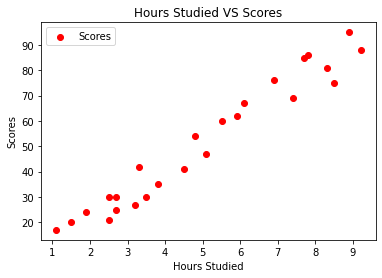

In [9]:
plt.scatter(X,Y,color = 'red')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend(['Scores'])
plt.title('Hours Studied VS Scores')

###### 4)Splitting the dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

###### 5)Training the model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

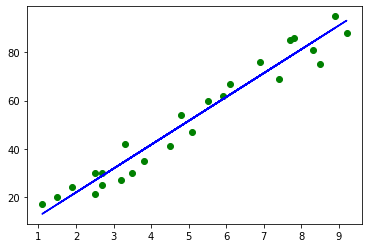

In [12]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,Y, color = 'green')
plt.plot(X,line,color = 'blue')

###### 6)Testing the model

In [13]:
Y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Hours':X_test.flatten(),'Actual':Y_test, 'Predicted':Y_pred})
df

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


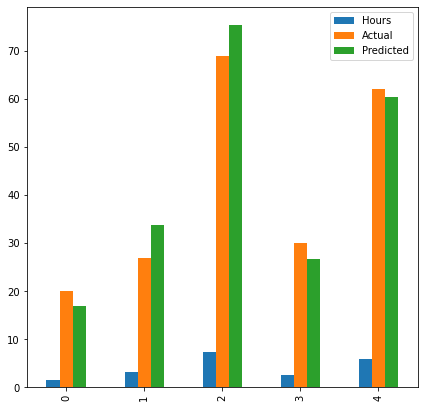

In [15]:
df.plot(kind = 'bar',figsize = (7,7))

###### 7)Model Evaluation

In [16]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


###### 8)Accuracy of the model

In [17]:
print("Training Accuracy Percentage:",regressor.score(X_train,Y_train)*100)
print("Test Accuracy Percentage:",regressor.score(X_test,Y_test)*100)

Training Accuracy Percentage: 95.15510725211553
Test Accuracy Percentage: 94.54906892105356


###### 8)Predicting from Random Data

In [18]:
hours = 9.25
score = regressor.predict([[hours]])

print(f'Predicted Score for studying {hours} hours is {score[0]}')

Predicted Score for studying 9.25 hours is 93.69173248737538
